# Variational MC solution of the Schroedinger Equation

Here we are going to investigate a solution to the Schroedinger equation using variational MC. Here we will look at the quantum harmonic oscillator. 

### Compile and import

In [1]:
! swig -c++ -python swig/vmc.i
! python swig/setup_vmc.py build_ext --inplace

running build_ext
building '_vmc' extension
x86_64-linux-gnu-gcc -pthread -Wno-unused-result -Wsign-compare -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -g -fwrapv -O2 -g -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -I/usr/include/python3.7m -c swig/vmc_wrap.cxx -o build/temp.linux-x86_64-3.7/swig/vmc_wrap.o -I./ -std=c++11 -O3
x86_64-linux-gnu-gcc -pthread -Wno-unused-result -Wsign-compare -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -g -fwrapv -O2 -g -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -I/usr/include/python3.7m -c vmc.cpp -o build/temp.linux-x86_64-3.7/vmc.o -I./ -std=c++11 -O3
x86_64-linux-gnu-g++ -pthread -shared -Wl,-O1 -Wl,-Bsymbolic-functions -Wl,-Bsymbolic-functions -Wl,-z,relro -Wl,-Bsymbolic-functions -Wl,-z,relro -g -fstack-protector-strong -Wformat -Werror=format-security -W

In [2]:
import sys
import os
sys.path.append( os.path.abspath("swig") )

### Set up and run the simulation

In [3]:
import vmc
import numpy as np
import matplotlib.pyplot as plt

In [4]:
N=10 
alpha=0.2
MCSteps=10000
  
qho = vmc.QHO(N,alpha,MCSteps)
qho.adjustStep()
qho.doProductionSteps()
qho.normPsi()

### Plot the wavefunction

In [5]:
xMin = qho.get_xMin()
xMax = qho.get_xMax()
dx = qho.get_dx()
xvals = np.arange(xMin, xMax, dx)
psi = np.sqrt( np.abs(qho.get_psiSqd()) )

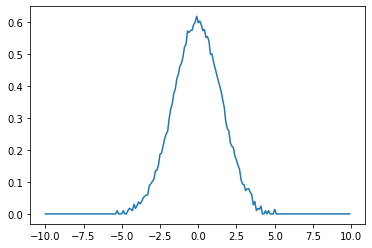

In [6]:
plt.plot(xvals, psi)
plt.show()